In [1]:
import polars as pl
import os 
from glob import glob
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
INPUT_PATH = '/mnt/zfsdata/t_cells/P20407/mt_ac/output'


In [3]:
cell_count = []

# Get all allele counts files in the input path
cell_count_filenames = list(glob(os.path.join(INPUT_PATH, '*.t*'))) #*.txt/.tsv

i = 0 
for filename in sorted(cell_count_filenames):
    name = os.path.basename(filename).split('.')[0]
    

    # Load one allele count file
    counts = pl.scan_csv(filename, separator='\t', has_header=True).select(['POS', 'Good_depth'])
    #counts = pd.read_csv(filename, sep='\t')[['POS', 'Good_depth']]
    cell_count.append(counts)
    #i += 1 
    #if i > 1000: 
    #    break 
# Get sample order

pl_test = pl.concat(cell_count)
test  = pl_test.groupby('POS').mean()
test = test.collect()
test = test.sort("POS")
test = test.to_pandas()

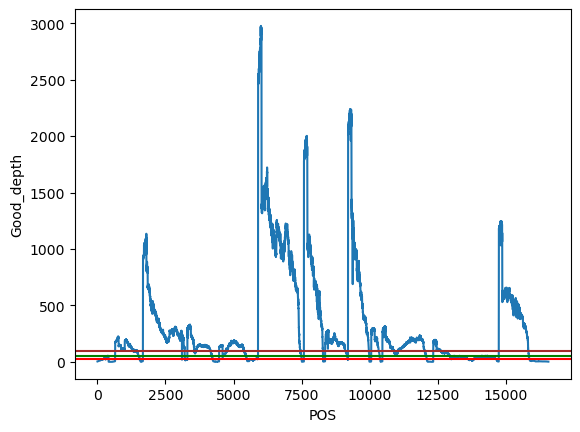

In [4]:
sns.lineplot(x=test["POS"], y=test["Good_depth"])
plt.axhline(y=100, color='brown')
plt.axhline(y=50, color='green')
plt.axhline(y=30, color='red')


plt.show()

'A1_06_metadata_11082021'

In [19]:
cell_count = []

# Get all allele counts files in the input path
cell_count_filenames = list(glob(os.path.join('/home/carler/lab/t_cell/phylogeny/data/ac_input_old', '*.t*'))) #*.txt/.tsv

i = 0 
for filename in sorted(cell_count_filenames):
    
    name = os.path.basename(filename).split('.')[0]
    

    # Load one allele count file
    counts = pl.scan_csv(filename, separator='\t', has_header=True).select(['POS', 'Good_depth'])
    #counts = pd.read_csv(filename, sep='\t')[['POS', 'Good_depth']]
    cell_count.append(counts)
    #i += 1 
    #if i > 1000: 
    #    break 
# Get sample order


pl_test = pl.concat(cell_count)
test  = pl_test.groupby('POS').mean()
test = test.collect()
test = test.sort("POS")
test = test.to_pandas()

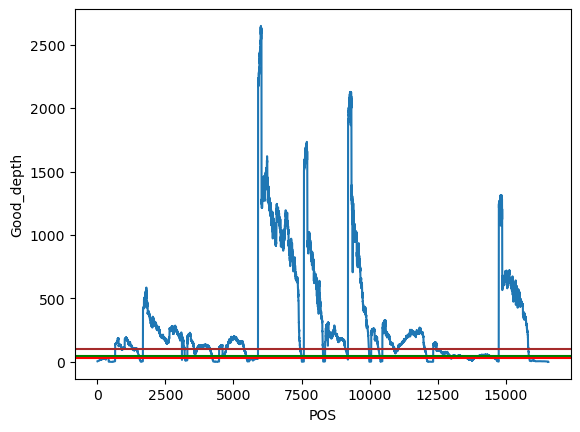

In [20]:
sns.lineplot(x=test["POS"], y=test["Good_depth"])
plt.axhline(y=100, color='brown')
plt.axhline(y=50, color='green')
plt.axhline(y=30, color='red')


plt.show()

In [30]:

lazy_sum = cell_count[0]

for lazy_df in cell_count[1:100]: 
    lazy_sum = lazy_sum.join(lazy_df, on='POS')
    lazy_sum = lazy_sum.select(pl.col(["Good_depth", "Good_depth_right"]).sum() ) 

    lazy_sum = lazy_sum.drop("Good_depth_right")

thread '<unnamed>' panicked at 'called `Result::unwrap()` on an `Err` value: ColumnNotFound(ErrString("POS\n\nError originated just after this operation:\nDROP\n   SELECT [col(\"Good_depth\").sum(), col(\"Good_depth_right\").sum()] FROM\n    INNER JOIN:\n    LEFT PLAN ON: [col(\"POS\")]\n       SELECT [col(\"POS\"), col(\"Good_depth\")] FROM\n\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A1.txt\n          PROJECT */7 COLUMNS\n    RIGHT PLAN ON: [col(\"POS\")]\n       SELECT [col(\"POS\"), col(\"Good_depth\")] FROM\n\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A10.txt\n          PROJECT */7 COLUMNS\n    END INNER JOIN\n\nError originated just after this operation:\nErrorStateSync(Mutex { data: AlreadyEncountered { prev_err_msg: \"ColumnNotFound(ErrString(\\\"POS\\\\n\\\\nError originated just after this operation:\\\\nDROP\\\\n   SELECT [col(\\\\\\\"Good_depth\\\\\\\").sum(), col(\\\\\\\"Good_depth_right\\\\\\\").s

PanicException: called `Result::unwrap()` on an `Err` value: ColumnNotFound(ErrString("POS\n\nError originated just after this operation:\nDROP\n   SELECT [col(\"Good_depth\").sum(), col(\"Good_depth_right\").sum()] FROM\n    INNER JOIN:\n    LEFT PLAN ON: [col(\"POS\")]\n       SELECT [col(\"POS\"), col(\"Good_depth\")] FROM\n\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A1.txt\n          PROJECT */7 COLUMNS\n    RIGHT PLAN ON: [col(\"POS\")]\n       SELECT [col(\"POS\"), col(\"Good_depth\")] FROM\n\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A10.txt\n          PROJECT */7 COLUMNS\n    END INNER JOIN\n\nError originated just after this operation:\nErrorStateSync(Mutex { data: AlreadyEncountered { prev_err_msg: \"ColumnNotFound(ErrString(\\\"POS\\\\n\\\\nError originated just after this operation:\\\\nDROP\\\\n   SELECT [col(\\\\\\\"Good_depth\\\\\\\").sum(), col(\\\\\\\"Good_depth_right\\\\\\\").sum()] FROM\\\\n    INNER JOIN:\\\\n    LEFT PLAN ON: [col(\\\\\\\"POS\\\\\\\")]\\\\n       SELECT [col(\\\\\\\"POS\\\\\\\"), col(\\\\\\\"Good_depth\\\\\\\")] FROM\\\\n\\\\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A1.txt\\\\n          PROJECT */7 COLUMNS\\\\n    RIGHT PLAN ON: [col(\\\\\\\"POS\\\\\\\")]\\\\n       SELECT [col(\\\\\\\"POS\\\\\\\"), col(\\\\\\\"Good_depth\\\\\\\")] FROM\\\\n\\\\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A10.txt\\\\n          PROJECT */7 COLUMNS\\\\n    END INNER JOIN\\\"))\" }, poisoned: false, .. })\nDROP\n   SELECT [col(\"Good_depth\").sum(), col(\"Good_depth_right\").sum()] FROM\n    INNER JOIN:\n    LEFT PLAN ON: [col(\"POS\")]\n       SELECT [col(\"POS\"), col(\"Good_depth\")] FROM\n\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A1.txt\n          PROJECT */7 COLUMNS\n    RIGHT PLAN ON: [col(\"POS\")]\n       SELECT [col(\"POS\"), col(\"Good_depth\")] FROM\n\n          CSV SCAN /home/carler/lab/t_cell/phylogeny/data/ac_input/A1_06_D14_p1_A10.txt\n          PROJECT */7 COLUMNS\n    END INNER JOIN"))

In [26]:
test = lazy_sum.collect().sort('POS')

In [28]:
test.select(pl.sum("Good_depth"))

Good_depth
i64
435727


In [36]:
cell_count[0].collect().select(pl.sum('Good_depth')) 

Good_depth
i64
435727


In [15]:
df.select(pl.sum("Good_depth"))


Good_depth
i64
435727
